# RSG (Renta Sostenible Global) V.S RAC (Renta Alta Convicción)

## By Julian Restrepo

## Summary

This script will analyze 2 Mutual Funds from the bank Bancolombia located in Colombia.

RSG is a ESG mutual fund that invests in equity markets around the world.

RAC is a mutual fund attemps to replicate the return of a global market fund.

The calculations are going to give us the next measures:

### Returns:
- Historical
- Expected

### Risk:
- Volatility (Standart Deviation)
- Drawdowns
- Normality (Skewness and Kurtosis) and Jarque-Bera Test
- Sharpe Ratio
- CVAR(95%)

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import measures_tools as mt
%load_ext autoreload
%autoreload 2

## Importing data

The data is imported from CSV documents. The data contains the daily price for both funds and is assigned to a Pandas Dataframe

In [3]:
rsg = pd.read_csv("data/datos_fondo_rsg.csv", 
                  header=0,
                  index_col=0,
                  parse_dates=True
                 )

rac = pd.read_csv("data/datos_fondo_ra.csv", 
                  header=0,
                  index_col=0,
                  parse_dates=True
                 )


fund_value = pd.DataFrame({
    'rac':rac['VALOR UNIDAD'],
    'rsg':rsg['VALOR UNIDAD']
})

## General data overview

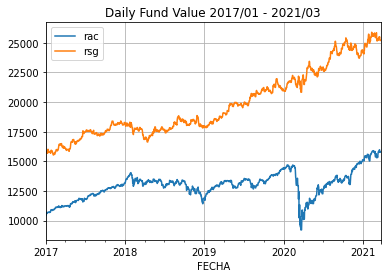

In [4]:
fund_value.plot(title=('Daily Fund Value 2017/01 - 2021/03'));
plt.grid()

## Returns

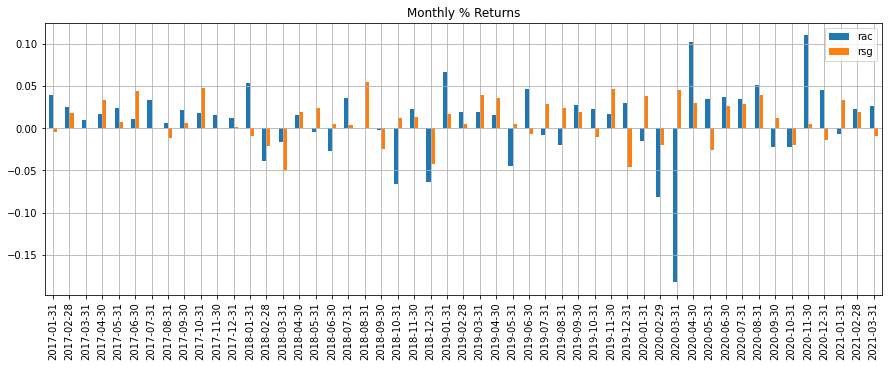

In [35]:
# Pct_change daily:
returns_d = fund_value.pct_change()

# Converting daily returns to monthly:
returns_m = returns_d.resample('M').agg(lambda x: (x + 1).prod() - 1)

returns_m.index = pd.to_datetime(returns_m.index).date

# Plotting Monthly Returns
returns_m.plot.bar(figsize=(15, 5), grid=True, title=('Monthly % Returns'));

## Risk Measures

In [31]:
# Volatility measure:

vol_m = returns_m.std()
vol_ann = vol_m * np.sqrt(12)
vol_ann

rac    0.157476
rsg    0.086727
dtype: float64

In [9]:
# Sharpe Ratio:
risk_free_rate = 0.03

excess_return = returns_ann - risk_free_rate

sharpe_ratio = excess_return/vol_ann

sharpe_ratio

rac    0.457911
rsg    0.978761
dtype: float64

We can start by saying that the Sharpe Ratio of RSG is pretty good and that in comparison with RAC, RSG is a far better investment talking about risk and reward.

## Drawdown

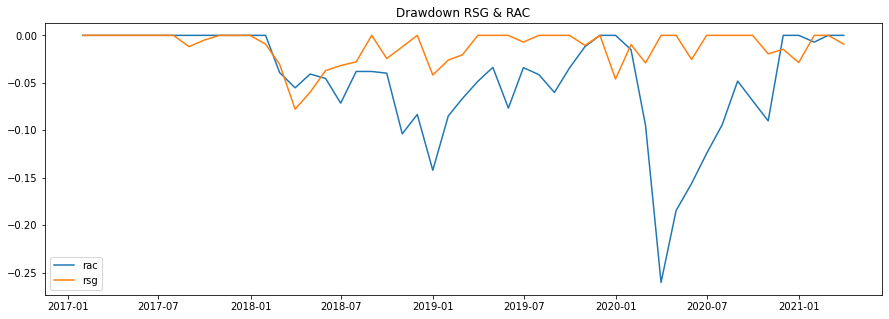

In [37]:
# Creating a wealth_index for measuring Drawdown:
wealth_index = 1000*(1 + returns_m).cumprod()

# Creating maximums graph for measure drawdown:
previous_peaks = wealth_index.cummax()

drawdown = (wealth_index - previous_peaks)/previous_peaks

drawdown.plot(figsize=(15, 5), title="Drawdown RSG & RAC");

### 1000 invested from 2017 to 2021

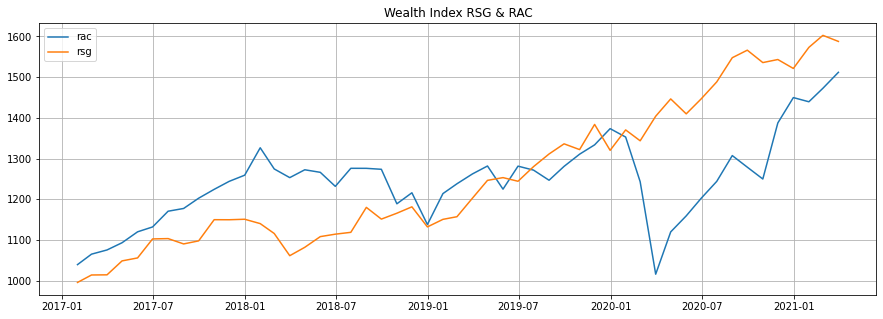

In [40]:
wealth_index.plot(figsize=(15, 5), title='Wealth Index RSG & RAC');
plt.grid()

## Normality

### Skewness And Kurtosis

In [49]:
# Skewness
sk_returns = mt.skewness(returns_m)
sk_returns

rac   -1.426283
rsg   -0.335451
dtype: float64

In [48]:
# Kurtosis
kr_returns = mt.kurtosis(returns_m)
excess_kr = kr_returns - 3
excess_kr

rac    5.153518
rsg   -0.430012
dtype: float64

## Plotting Distribution returns to analyze ranges and normality

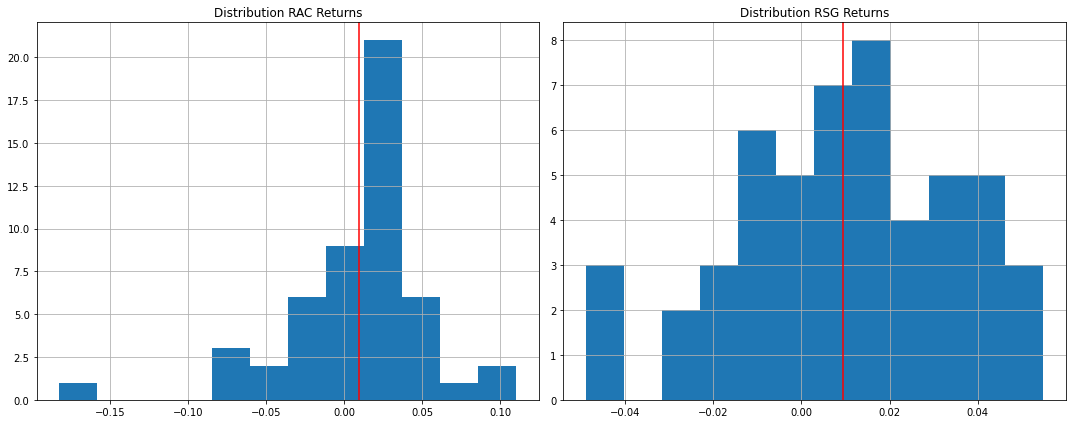

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))

ax1.hist(returns_m['rac'], bins = int(12))
ax1.set_title("Distribution RAC Returns")
ax1.axvline(returns_m['rac'].mean(), color='r')
ax1.grid()

ax2.hist(returns_m['rsg'], bins = int(12))
ax2.set_title("Distribution RSG Returns")
ax2.axvline(returns_m['rsg'].mean(), color='r')
ax2.grid()

plt.tight_layout()

In [45]:
# Jarque-Bera test for RSG
mt.is_normal(returns_m['rsg'])

True

In [42]:
# Jarque-Bera test for R
mt.is_normal(returns_m['rac'])

False

## Conclusions of skewness and kurtosis

- RSG:
1. The Skewness and Kurtosis are way to similar to a normal distribution, 49% of his data is more than the mean.
2. The ranges of the historical returns are safe going from -2% to 6%.
3. Jarque-bera test confirms normal distribution.

- RAC:
1. The distribution returns of RAC show that RAC is not justifing the fact that its a bigger risk fund with the returns that it provides.
2. Jarque-bera test does not confirms normal distribution.

## Downside measures

In [43]:
# Historic Var (95):

mt.var_historic(returns_m)*100

# Gaussian Var (95):

mt.var_gaussian(returns_m)*100

# Cornish-Fisher Var (95):

mt.var_gaussian(returns_m, modified=True)*100

# Historic Cvar:

mt.cvar_historic(returns_m)*100

rac    11.010586
rsg     4.553086
dtype: float64

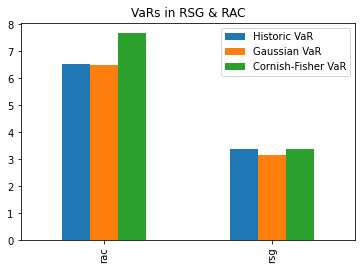

In [44]:
var_list = [mt.var_historic(returns_m)*100, mt.var_gaussian(returns_m)*100, mt.var_gaussian(returns_m, modified=True)*100]
comparison_var = pd.concat(var_list, axis=1)
comparison_var.columns = ['Historic VaR', 'Gaussian VaR', 'Cornish-Fisher VaR']
comparison_var.plot.bar(title="VaRs in RSG & RAC");

## Conclusions VAR AND CVAR:

### RSG

We can spect to losse 3.2% or more 5% of the months in RSG.\
The Avg. losses in 5% of the months is 4.5% in RSG.

### RAC
We can spect to losse 6% or more 5% of the months in RAC.\
The Avg. Losses in 5% of the months is 11% in RAC



